In [98]:
#importar dependencias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [99]:
path = 'C://Users//diego//Documents//New_studies//env_1_studies//env_1//Dataset//dataset_bike//'
df_day = pd.read_csv(path +'day.csv')
df_hour = pd.read_csv(path +'hour.csv')

In [100]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [101]:
print(df_day.columns)
print(df_day.isnull().sum())

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [102]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [103]:
df_day.rename(columns={'instant':'id', 'dteday':'date', 'weathersit': 'weather_cond','yr':'year', 
                       'mnth':'month', 'hum':'humidity', 'cnt': 'count'}, inplace=True)

In [104]:
## função para fazer algumas modificações e tratamento nos dados (graficas e analise exploratorio)
def get_bike_data(bike):
    # Leer el archivo CSV
    
    
    # Convertir algunas columnas en factores con etiquetas específicas
    bike['weekday'] = pd.Categorical(bike['weekday'], categories=range(7), ordered=True)
    bike['weekday'] = bike['weekday'].cat.rename_categories(['SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT'])
    bike['holiday'] = pd.Categorical(bike['holiday'], categories=[0, 1], ordered=True)
    bike['holiday'] = bike['holiday'].cat.rename_categories(['NO HOLIDAY', 'HOLIDAY'])
    bike['workingday'] = pd.Categorical(bike['workingday'], categories=[0, 1], ordered=True)
    bike['workingday'] = bike['workingday'].cat.rename_categories(['NO WORKING DAY', 'WORKING DAY'])
    bike['season'] = pd.Categorical(bike['season'], categories=range(1, 5), ordered=True)
    bike['season'] = bike['season'].cat.rename_categories(['WINTER', 'SPRING', 'SUMMER', 'FALL'])
    bike['weather_cond'] = pd.Categorical(bike['weather_cond'], categories=range(1, 4), ordered=True)
    bike['weather_cond'] = bike['weather_cond'].cat.rename_categories(['GOOD', 'MISTY', 'RAIN/SNOW/STORM'])
    bike['month'] = pd.Categorical(bike['month'], categories=range(1, 13), ordered=True)
    bike['month'] = bike['month'].cat.rename_categories(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
    
    # Reemplazar valores en la columna yr
    bike.loc[bike['year'] == 0, 'year'] = 2011
    bike.loc[bike['year'] == 1, 'year'] = 2012
    bike['year'] = pd.Categorical(bike['year'])
    
    # Calcular la diferencia en días desde 2011 para la columna dteday
    bike['days_since_2011'] = (pd.to_datetime(bike['date']) - pd.to_datetime(bike['date']).min()).dt.days
    
    # Desnormalizar algunas características del clima
    bike['temp'] = bike['temp'] * (39 - (-8)) + (-8)
    bike['atemp'] = bike['atemp'] * (50 - (16)) + (16)
    bike['windspeed'] = 67 * bike['windspeed']
    bike['humidity'] = 100 * bike['humidity']
    
    # Seleccionar algunas columnas específicas
    return bike[['season','year', 'month', 'holiday','workingday','weather_cond','temp','humidity','windspeed','days_since_2011']]


## Olhemos um pouco...

In [6]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


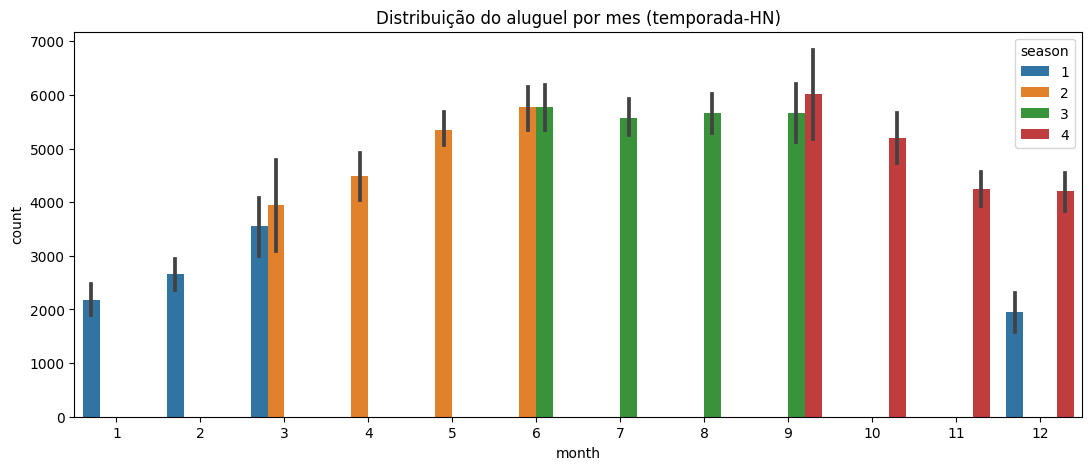

In [105]:
#Bar plot for seasonwise monthly distribution of counts
fig,ax=plt.subplots(figsize=(13,5))
sns.barplot(x='month',y='count',data=df_day[['month','count','season']],hue='season',ax=ax)
ax.set_title('Distribuição do aluguel por mes (temporada-HN)')
plt.show()

In [106]:
bike = df_day.copy()
X = get_bike_data(bike)
y = bike['count']

In [107]:
X.head()

,season,year,month,holiday,workingday,weather_cond,temp,humidity,windspeed,days_since_2011
0,WINTER,2011,JAN,NO HOLIDAY,NO WORKING DAY,MISTY,8.175849,80.5833,10.749882,0
1,WINTER,2011,JAN,NO HOLIDAY,NO WORKING DAY,MISTY,9.083466,69.6087,16.652113,1
2,WINTER,2011,JAN,NO HOLIDAY,WORKING DAY,GOOD,1.229108,43.7273,16.636703,2
3,WINTER,2011,JAN,NO HOLIDAY,WORKING DAY,GOOD,1.400000,59.0435,10.739832,3
4,WINTER,2011,JAN,NO HOLIDAY,WORKING DAY,GOOD,2.666979,43.6957,12.522300,4


In [108]:
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: count, Length: 731, dtype: int64

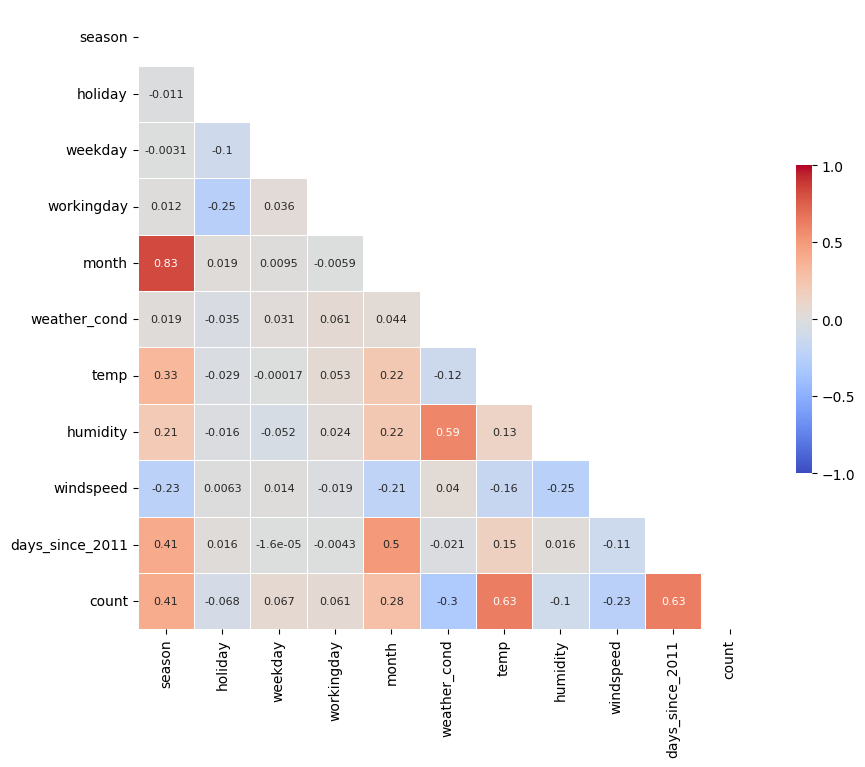

In [111]:
df_day['days_since_2011'] = (pd.to_datetime(df_day['date']) - pd.to_datetime(df_day['date']).min()).dt.days
matriz_correlacion = df_day[['season','holiday','weekday','workingday','month','weather_cond','temp','humidity','windspeed','days_since_2011', 'count']].corr()
mask = np.zeros_like(matriz_correlacion, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(10, 10))

heatmap = sns.heatmap(matriz_correlacion,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks': [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True, annot_kws={"fontsize":8})


ax.set_yticklabels(matriz_correlacion.columns, rotation = 0)
ax.set_xticklabels(matriz_correlacion.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
print(f"El dataset de entrenamiento cuenta con {len(X_train)} observaciones")
print(f"El dataset de evaluación cuenta con {len(X_test)} observaciones")

El dataset de entrenamiento cuenta con 584 observaciones
El dataset de evaluación cuenta con 147 observaciones


In [9]:
bike_features_of_interest =['season','holiday','workingday','weathersit','temp','hum','windspeed','days_since_2011']

In [23]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_since_2011
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4


In [25]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_since_2011
0,1,2011-01-01,WINTER,2011,JAN,NO HOLIDAY,SAT,NO WORKING DAY,MISTY,8.175849,28.363250,80.5833,10.749882,331,654,985,0
1,2,2011-01-02,WINTER,2011,JAN,NO HOLIDAY,SUN,NO WORKING DAY,MISTY,9.083466,28.027126,69.6087,16.652113,131,670,801,1
2,3,2011-01-03,WINTER,2011,JAN,NO HOLIDAY,MON,WORKING DAY,GOOD,1.229108,22.439770,43.7273,16.636703,120,1229,1349,2
3,4,2011-01-04,WINTER,2011,JAN,NO HOLIDAY,TUE,WORKING DAY,GOOD,1.400000,23.212148,59.0435,10.739832,108,1454,1562,3
4,5,2011-01-05,WINTER,2011,JAN,NO HOLIDAY,WED,WORKING DAY,GOOD,2.666979,23.795180,43.6957,12.522300,82,1518,1600,4


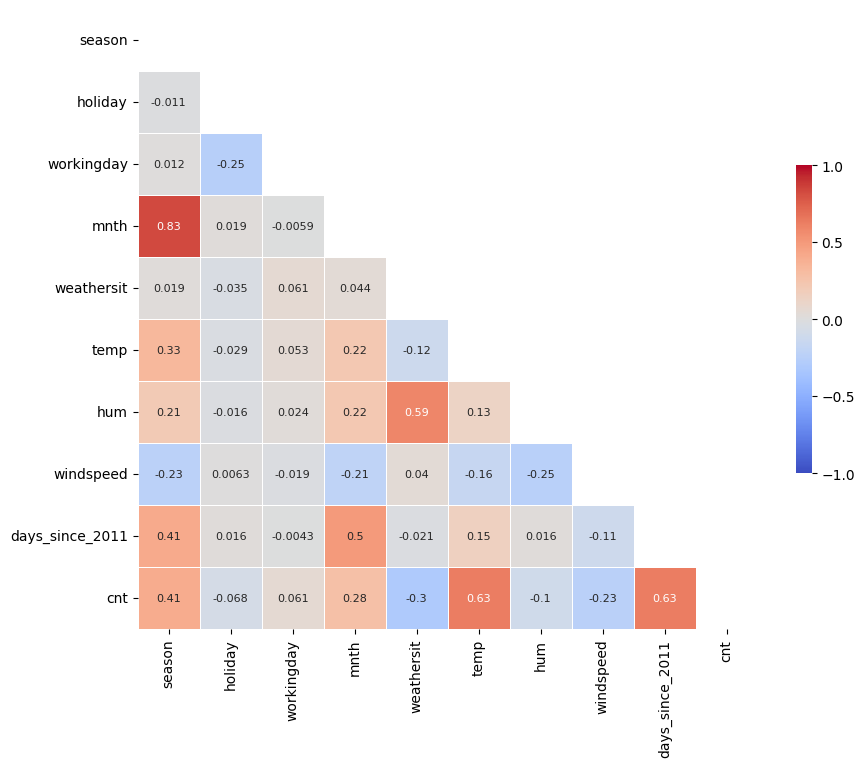

In [53]:
df_day['days_since_2011'] = (pd.to_datetime(df_day['dteday']) - pd.to_datetime(df_day['dteday']).min()).dt.days
matriz_correlacion = df_day[['season','holiday','workingday','mnth','weathersit','temp','hum','windspeed','days_since_2011', 'cnt']].corr()
mask = np.zeros_like(matriz_correlacion, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(10, 10))

heatmap = sns.heatmap(matriz_correlacion,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks': [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True, annot_kws={"fontsize":8})


ax.set_yticklabels(matriz_correlacion.columns, rotation = 0)
ax.set_xticklabels(matriz_correlacion.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

C:\Users\diego\AppData\Local\Temp\ipykernel_13384\912061156.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = bike[['season','holiday','workingday','mnth','weathersit','temp','hum','windspeed','days_since_2011', 'cnt']].corr()


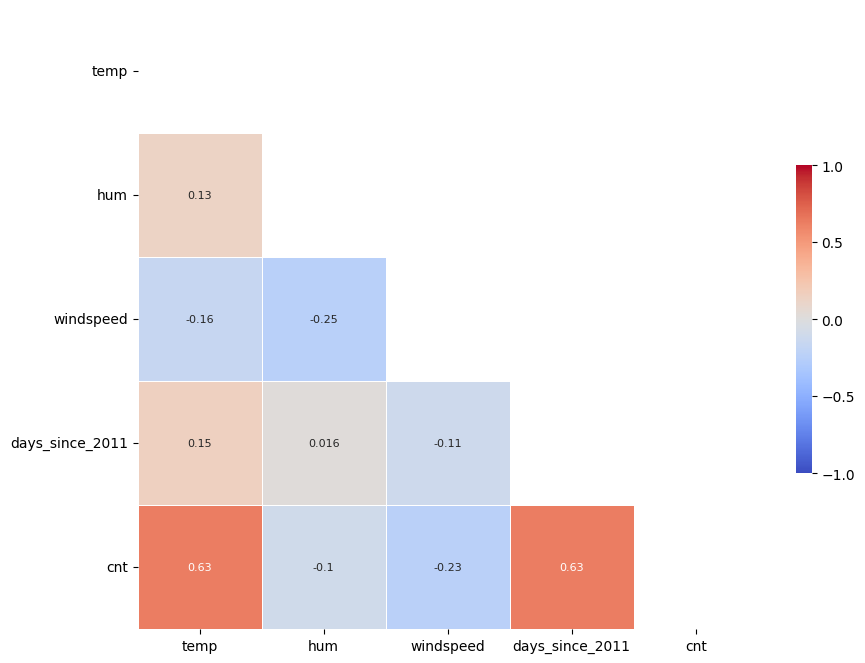

In [52]:

matriz_correlacion = bike[['season','holiday','workingday','mnth','weathersit','temp','hum','windspeed','days_since_2011', 'cnt']].corr()
mask = np.zeros_like(matriz_correlacion, dtype=bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(10, 10))

heatmap = sns.heatmap(matriz_correlacion,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks': [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True, annot_kws={"fontsize":8})


ax.set_yticklabels(matriz_correlacion.columns, rotation = 0)
ax.set_xticklabels(matriz_correlacion.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

Olhemos o comportamento de algumas variaveis categoricas com respeito a variavel objeytivo (cnt)

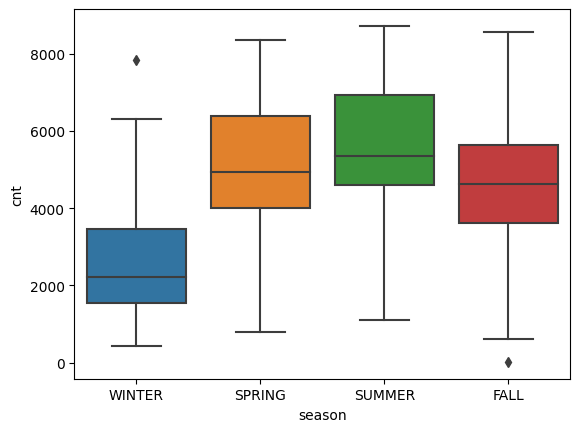

In [27]:
sns.boxplot(x='season', y='cnt', data=bike);

<Axes: xlabel='holiday', ylabel='cnt'>

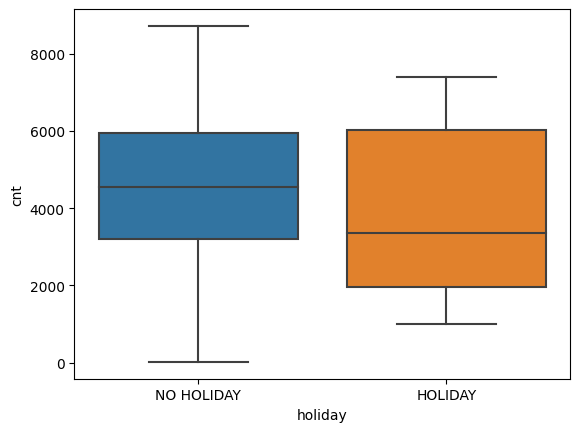

In [28]:
sns.boxplot(x='holiday', y = 'cnt', data=bike)

<Axes: xlabel='workingday', ylabel='cnt'>

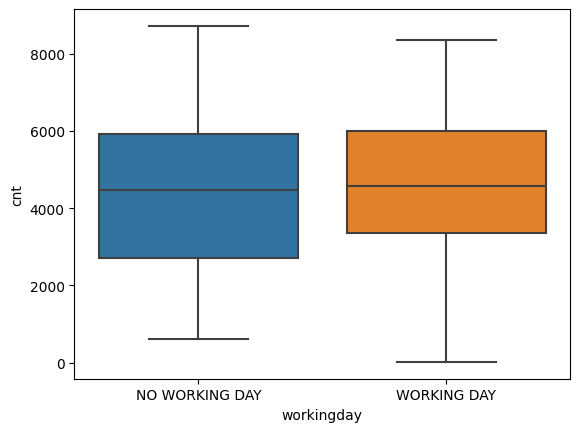

In [29]:
sns.boxplot(x = 'workingday', y ='cnt', data=bike)

<Axes: xlabel='weathersit', ylabel='cnt'>

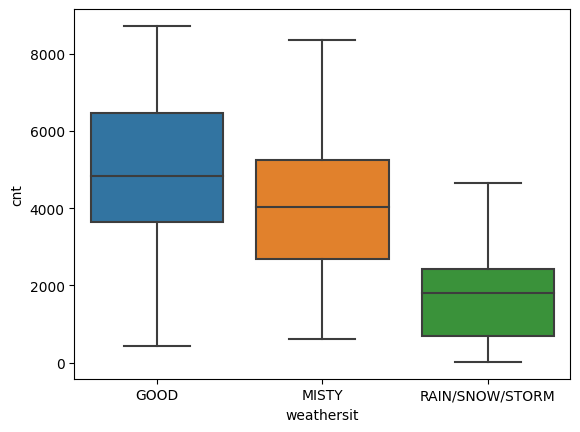

In [30]:
sns.boxplot(x = 'weathersit', y='cnt', data=bike)

<Axes: xlabel='weekday', ylabel='cnt'>

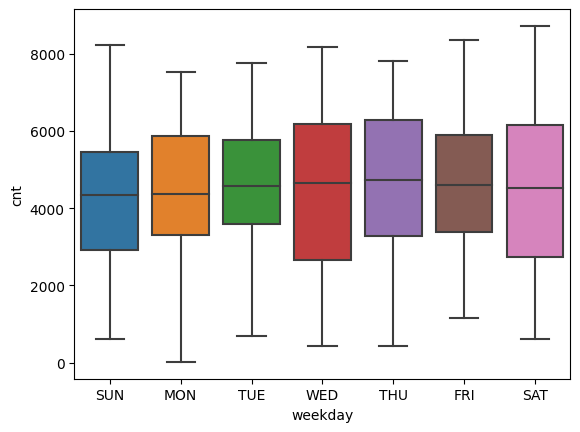

In [31]:
sns.boxplot(x ='weekday', y = 'cnt', data=bike)

Olhando as graficas acima podemos ver que algumas destas variaveis tem uma relação muito forte com a variavel objetivo: season, holiday, weathersit. Agora vemos também que a mediana de aluguel de bikes não muda notavelmente para nenhum dia em particular da semana (nem quando é dia util ou final de semana)

## Modelagem


Primeiro vamos construir um modelo e olhar as metricas correspondentes usando sómente as variaveis numericas que sengundo vimos na matrix de correlação são as mais relacionadas com a variavel objetivo. 

In [43]:
variables_exogenas = ['temp', 'hum', 'windspeed']
# Construimos la matriz de X
X_train_modelo_vnum = X_train[variables_exogenas]
X_train_modelo_vnum.head()

,temp,hum,windspeed
97,7.784151,83.6250,15.208464
503,18.515849,52.3333,9.166739
642,22.902500,72.2917,7.875582
498,20.787500,57.6250,15.082839
303,7.980000,70.3333,7.125450


In [44]:
# Importamos o modelo linear
from sklearn.linear_model import LinearRegression
# Definimos uma instancia do modelo linear com scikit learn
modelo_lineal_vnum = LinearRegression(fit_intercept=True)
# Realizamos o processo de estimação
modelo_lineal_vnum.fit(X_train_modelo_vnum, y_train)

LinearRegression()

In [45]:
# Definimos una función para obtener los coeficientes en un dataframe
def obter_coeficientes(modelo, lista_variables):
    '''Crea un dataframe con los coeficientes estimados de un modelo'''
    # Creo la lista de nombres de variables
    lista_variables = ['intercepto'] + lista_variables
    # Intercepto
    intercepto = modelo.intercept_
    # Lista coeficientes excepto el intercepto
    coeficientes = list(modelo.coef_)
    # Lista completa coeficientes
    lista_coeficientes = [intercepto] + coeficientes
    return pd.DataFrame({"variable": lista_variables, "coeficiente": lista_coeficientes})

In [46]:
# Obtenemos nuestro dataframe 
coeficientes_modelo_vnum = obter_coeficientes(modelo_lineal_vnum, variables_exogenas)
coeficientes_modelo_vnum

,variable,coeficiente
0,intercepto,5374.036059
1,temp,140.474745
2,hum,-32.620491
3,windspeed,-76.024125


In [47]:
# Importamos las métricas desde scikit-learn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_vnum = modelo_lineal_vnum.predict(X_train_modelo_vnum)


In [48]:
# Calculamos R cuadrado
print(r2_score(y_train, y_train_vnum))
# Calculamos MSE
print(mean_squared_error(y_train, y_train_vnum))
# Calculamos RMSE
print(np.sqrt(mean_squared_error(y_train, y_train_vnum)))
#obtener MAE
print(mean_absolute_error(y_train, y_train_vnum))



0.48135888937405336
1877485.2215187214
1370.2135678494508
1116.5847971283126


In [49]:
# definimos melhor uma função para obter as metricas
def obtener_metricas_performance(y_verdadera, y_predicha, tipo_dataset):
    r2 = r2_score(y_verdadera, y_predicha)
    mse = mean_squared_error(y_verdadera, y_predicha)
    rmse = np.sqrt(mse) 
    mae = mean_absolute_error(y_verdadera, y_predicha)
    return pd.DataFrame({'metrica': ['R2', 'MSE', 'RMSE', 'MAE'],
                         'valor':[r2, mse, rmse, mae],
                         'tipo_dataset':tipo_dataset})

In [50]:
obtener_metricas_performance(y_train, y_train_vnum, 'entrenamiento')

,metrica,valor,tipo_dataset
0,R2,4.813589e-01,entrenamiento
1,MSE,1.877485e+06,entrenamiento
2,RMSE,1.370214e+03,entrenamiento
3,MAE,1.116585e+03,entrenamiento


Vamos olhar com o dataset de evaluação como está performando o modelo de variaveis númericas

In [51]:
# Criamos a matrix de X_test
X_test_vnum= X_test[['temp', 'hum', 'windspeed']]
# Predecimos los valores
y_test_vnum =  modelo_lineal_vnum.predict(X_test_vnum)
# Obtenemos nuestro dataframe de métricas de performance
performance_test_vnum =obtener_metricas_performance(y_test, y_test_vnum, 'evaluacion')
performance_train_vnum =obtener_metricas_performance(y_train, y_train_vnum, 'entrenamiento')
# Mostramos en conjunto las métricas para entrenamiento y evaluación
pd.concat([performance_train_vnum, performance_test_vnum])

,metrica,valor,tipo_dataset
0,R2,4.813589e-01,entrenamiento
1,MSE,1.877485e+06,entrenamiento
2,RMSE,1.370214e+03,entrenamiento
3,MAE,1.116585e+03,entrenamiento
0,R2,3.905734e-01,evaluacion
1,MSE,2.591978e+06,evaluacion
2,RMSE,1.609962e+03,evaluacion
3,MAE,1.349023e+03,evaluacion


### Modelo com variaveis categoricas

Olhando as graficas acima vamos usar as variaveis categoricas de weathersit (clima), season (temporada) e dia feriado (holiday)

In [74]:
from sklearn.preprocessing import OneHotEncoder
# Definimos a intancia do transformer
one_hot_encoder = OneHotEncoder(categories=[['FALL', 'SPRING','SUMMER', 'WINTER']])
# Realizamos el fit con los datos de entrenamiento
one_hot_encoder.fit(X_train[['season']])
# Accedemos a las categorias del encoder
one_hot_encoder.categories_
# Generamos las variables dummies de la variable property type (notemos que tenemos 2 columnas!)
matriz_dummies = one_hot_encoder.transform(X_train[['season']]).toarray()
matriz_dummies

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]])

In [75]:
nombres_dummies = ['season_spring', 'season_summer', 'season_fall', 'season_winter']
# Generamos el dataframe con las variables dummies con las matrices y columnas
df_dummies = pd.DataFrame(matriz_dummies, columns=nombres_dummies, index=X_train.index)
df_dummies.head()

,season_spring,season_summer,season_fall,season_winter
97,0.0,1.0,0.0,0.0
503,0.0,1.0,0.0,0.0
642,1.0,0.0,0.0,0.0
498,0.0,1.0,0.0,0.0
303,1.0,0.0,0.0,0.0


In [76]:
# Agregamos la información a nuestra matriz de variables predictoras
X_train = X_train.join(df_dummies)
X_train.head()

,season,holiday,workingday,weathersit,temp,hum,windspeed,days_since_2011,season_spring,season_summer,season_fall,season_winter
97,SPRING,NO HOLIDAY,WORKING DAY,MISTY,7.784151,83.6250,15.208464,97,0.0,1.0,0.0,0.0
503,SPRING,NO HOLIDAY,WORKING DAY,GOOD,18.515849,52.3333,9.166739,503,0.0,1.0,0.0,0.0
642,FALL,NO HOLIDAY,WORKING DAY,MISTY,22.902500,72.2917,7.875582,642,1.0,0.0,0.0,0.0
498,SPRING,NO HOLIDAY,NO WORKING DAY,GOOD,20.787500,57.6250,15.082839,498,0.0,1.0,0.0,0.0
303,FALL,NO HOLIDAY,WORKING DAY,GOOD,7.980000,70.3333,7.125450,303,1.0,0.0,0.0,0.0


In [77]:
X_train.season.value_counts()

SPRING    152
SUMMER    146
FALL      146
WINTER    140
Name: season, dtype: int64

In [88]:
# Definimos las variables exogenas (predictores)
variables_exogenas = ['temp', 'hum', 'windspeed',  'season_spring', 'season_summer',	'season_fall', 'season_winter']

# Construimos la matriz de X
X_train_modelo_season = X_train[variables_exogenas]

# Definimos una instancia del modelo lineal con scikit learn
modelo_lineal_season = LinearRegression(fit_intercept=True)

# Realizamos el proceso de estimación
modelo_lineal_season.fit(X_train_modelo_season, y_train)

coeficientes_modelo_season = obter_coeficientes(modelo_lineal_season, variables_exogenas)
coeficientes_modelo_season

,variable,coeficiente
0,intercepto,5679.194051
1,temp,140.782995
2,hum,-39.262823
3,windspeed,-68.389169
4,season_spring,738.696149
5,season_summer,123.204531
6,season_fall,-252.273174
7,season_winter,-609.627507


In [89]:
y_train_season = modelo_lineal_season.predict(X_train_modelo_season)


In [90]:
obtener_metricas_performance(y_train, y_train_season, 'entrenamiento')

,metrica,valor,tipo_dataset
0,R2,5.458573e-01,entrenamiento
1,MSE,1.644000e+06,entrenamiento
2,RMSE,1.282186e+03,entrenamiento
3,MAE,1.074503e+03,entrenamiento


In [91]:
one_hot_encoder = OneHotEncoder(categories=[['FALL', 'SPRING','SUMMER', 'WINTER']])
# Realizamos el fit con los datos de entrenamiento
one_hot_encoder.fit(X_test[['season']])
# Accedemos a las categorias del encoder
one_hot_encoder.categories_
# Generamos las variables dummies de la variable property type (notemos que tenemos 2 columnas!)
matriz_dummies = one_hot_encoder.transform(X_test[['season']]).toarray()
matriz_dummies

# Generamos el dataframe con las variables dummies con las matrices y columnas
# df_dummies = pd.DataFrame(matriz_dummies, columns=nombres_dummies, index=X_test.index)
# X_test= X_test.join(df_dummies)
# # Criamos a matrix de X_test
# X_test_season= X_test[['temp', 'hum', 'windspeed', 'days_since_2011', 'season_spring', 'season_summer',	'season_fall', 'season_winter']]
# # Predecimos los valores
# y_test_season =  modelo_lineal_season.predict(X_test_season)
# # Obtenemos nuestro dataframe de métricas de performance
# performance_test_season =obtener_metricas_performance(y_test, y_test_season, 'evaluacion')
# performance_train_season =obtener_metricas_performance(y_train, y_train_season, 'entrenamiento')
# # Mostramos en conjunto las métricas para entrenamiento y evaluación
# pd.concat([performance_train_season, performance_test_season])

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],


In [92]:
df_dummies = pd.DataFrame(matriz_dummies, columns=nombres_dummies, index=X_test.index)

In [93]:
df_dummies

,season_spring,season_summer,season_fall,season_winter
196,0.0,0.0,1.0,0.0
187,0.0,0.0,1.0,0.0
14,0.0,0.0,0.0,1.0
31,0.0,0.0,0.0,1.0
390,0.0,0.0,0.0,1.0
...,...,...,...,...
566,0.0,0.0,1.0,0.0
688,1.0,0.0,0.0,0.0
266,1.0,0.0,0.0,0.0
504,0.0,1.0,0.0,0.0


In [95]:
X_test

,season,holiday,workingday,weathersit,temp,hum,windspeed,days_since_2011,season_spring,season_summer,season_fall,season_winter
196,SUMMER,NO HOLIDAY,NO WORKING DAY,GOOD,24.273349,58.5000,13.958914,196,0.0,0.0,1.0,0.0
187,SUMMER,NO HOLIDAY,WORKING DAY,GOOD,27.250000,65.1250,10.666400,187,0.0,0.0,1.0,0.0
14,WINTER,NO HOLIDAY,NO WORKING DAY,MISTY,2.966651,49.8750,10.583521,14,0.0,0.0,0.0,1.0
31,WINTER,NO HOLIDAY,WORKING DAY,MISTY,1.032178,82.9565,3.565271,31,0.0,0.0,0.0,1.0
390,WINTER,NO HOLIDAY,WORKING DAY,MISTY,8.058349,76.9583,4.917519,390,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
566,SUMMER,NO HOLIDAY,WORKING DAY,MISTY,23.294151,84.4167,14.000789,566,0.0,0.0,1.0,0.0
688,FALL,NO HOLIDAY,WORKING DAY,MISTY,9.899151,62.3333,15.749489,688,1.0,0.0,0.0,0.0
266,FALL,NO HOLIDAY,NO WORKING DAY,MISTY,20.513349,86.2500,5.251681,266,1.0,0.0,0.0,0.0
504,SPRING,NO HOLIDAY,NO WORKING DAY,GOOD,20.200000,45.6250,5.626325,504,0.0,1.0,0.0,0.0


In [96]:
X_test_season= X_test[variables_exogenas]

In [97]:
# Predecimos los valores
y_test_season =  modelo_lineal_season.predict(X_test_season)
# Obtenemos nuestro dataframe de métricas de performance
performance_test_season =obtener_metricas_performance(y_test, y_test_season, 'evaluacion')
performance_train_season =obtener_metricas_performance(y_train, y_train_season, 'entrenamiento')
# Mostramos en conjunto las métricas para entrenamiento y evaluación
pd.concat([performance_train_season, performance_test_season])

,metrica,valor,tipo_dataset
0,R2,5.458573e-01,entrenamiento
1,MSE,1.644000e+06,entrenamiento
2,RMSE,1.282186e+03,entrenamiento
3,MAE,1.074503e+03,entrenamiento
0,R2,4.931763e-01,evaluacion
1,MSE,2.155594e+06,evaluacion
2,RMSE,1.468194e+03,evaluacion
3,MAE,1.252894e+03,evaluacion


## Vamos fazer um test estatístico

In [58]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_since_2011
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,726
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,727
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,728
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,729


In [59]:
bike = df_day.copy()
X = df_day.drop(columns=['dteday', 'cnt'])
y = bike['cnt']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [61]:
# En statsmodels se le agrega el intercepto (en scikit se lo pasamos como un parametro a la instancia del modelo)
X_train_modelo_stats = sm.add_constant(X_train)
X_train_modelo_stats.head()

,const,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,days_since_2011
97,1.0,98,2,0,4,0,5,1,2,0.335833,0.324479,0.836250,0.226992,172,1299,97
503,1.0,504,2,1,5,0,5,1,1,0.564167,0.551121,0.523333,0.136817,1521,6118,503
642,1.0,643,4,1,10,0,4,1,2,0.657500,0.607975,0.722917,0.117546,891,6437,642
498,1.0,499,2,1,5,0,0,0,1,0.612500,0.585238,0.576250,0.225117,2172,3946,498
303,1.0,304,4,0,10,0,1,1,1,0.340000,0.356063,0.703333,0.106350,362,3307,303


In [62]:
# Construimos el modelo
modelo_stats = sm.OLS(y_train, X_train_modelo_stats)

In [63]:
# Guardamos los resultados
resultados_stats = modelo_stats.fit()

In [64]:
# Accedemos a los coeficientes estimados
resultados_stats.params

const             -2.785328e-12
instant           -1.421085e-12
season             1.989520e-13
yr                -5.002221e-12
mnth              -2.842171e-14
holiday            2.273737e-13
weekday           -3.090861e-13
workingday         2.273737e-13
weathersit         1.364242e-12
temp               2.273737e-12
atemp             -1.818989e-12
hum               -1.932676e-12
windspeed         -2.273737e-13
casual             1.000000e+00
registered         1.000000e+00
days_since_2011    1.421085e-12
dtype: float64

In [65]:
# Accedemos a los p valores de los tests de significancia individual
resultados_stats.pvalues

const              0.123912
instant            0.118550
season             0.751742
yr                 0.732312
mnth               0.981425
holiday            0.916573
weekday            0.077456
workingday         0.859357
weathersit         0.129558
temp               0.870803
atemp              0.908316
hum                0.583369
windspeed          0.963825
casual             0.000000
registered         0.000000
days_since_2011    0.114500
dtype: float64

In [66]:
resultados_stats.f_pvalue

0.0

In [68]:
# R cuadrado
resultados_stats.rsquared

1.0

In [69]:
resultados_stats.rsquared_adj

1.0

In [72]:
print(resultados_stats.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.255e+30
Date:                Wed, 09 Aug 2023   Prob (F-statistic):               0.00
Time:                        18:17:49   Log-Likelihood:                 14088.
No. Observations:                 584   AIC:                        -2.815e+04
Df Residuals:                     569   BIC:                        -2.808e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2.785e-12   1.81e-12     

In [73]:
# Importamos las métricas desde scikit-learn
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_vnum = modelo_lineal_vnum.predict(X_train_modelo_vnum)
y_train_vnum

array([1564.74914995, 6061.91224214, 6741.22310668, 5844.73010395,
       3387.99610448, 6809.31454479, 3846.83758273,  706.86763705,
       6777.16137347, 5073.70471929, 7639.96521915, 3128.53582537,
       4061.12693141, 5174.73548784, 5653.74649988, 4883.07601147,
       5059.7768608 , 2222.19957203, 7559.79407666, 1719.74447353,
       6120.87206556, 3044.01346161, 6340.24959706, 4332.38956231,
       4097.3068628 , 5907.6857732 , 3989.26056582, 6012.87218015,
       3201.3482157 , 3153.52349661, 4365.04100389, 3756.86831166,
       1077.83800204, 5608.99652653, 3418.67168561,  637.57238753,
       4917.29177494, 3360.97567494, 5919.12975664, 3110.44342788,
       4915.71013754, 5234.30867834, 4229.12102167, 3740.22108853,
       3762.75886729, 2672.30439053, 5644.8229729 , 6711.87411324,
       4886.04444053, 4766.04770669, 4312.8091511 , 5457.92787877,
       4183.64330452, 3658.64146353, 4733.10982556, 4056.51366223,
       5955.9394164 , 4878.4353216 , 4415.45735402, 4128.09471

In [74]:
# Calculamos R cuadrado
r2_score(y_train, y_train_vnum)

0.7468425364296349

916432.1663527346

957.3046361282987

699.42636083459

,metrica,valor,tipo_dataset
0,R2,0.746843,entrenamiento
1,MSE,916432.166353,entrenamiento
2,RMSE,957.304636,entrenamiento
3,MAE,699.426361,entrenamiento


In [84]:
# Ahora observemos las métricas del modelo de interacción en entrenamiento
y_train_vnum = modelo_lineal_vnum.predict(X_train_modelo_vnum)
performance_train_vnum = obtener_metricas_performance(y_train, y_train_vnum, 'entrenamiento')
performance_train_vnum

,metrica,valor,tipo_dataset
0,R2,0.746843,entrenamiento
1,MSE,916432.166353,entrenamiento
2,RMSE,957.304636,entrenamiento
3,MAE,699.426361,entrenamiento


,metrica,valor,tipo_dataset
0,R2,7.468425e-01,entrenamiento
1,MSE,9.164322e+05,entrenamiento
2,RMSE,9.573046e+02,entrenamiento
3,MAE,6.994264e+02,entrenamiento
0,R2,2.899940e-01,evaluacion
1,MSE,3.019757e+06,evaluacion
2,RMSE,1.737745e+03,evaluacion
3,MAE,1.348003e+03,evaluacion


olhemos com o modelo de season

In [87]:
# Generamos las variables dummies de la variable property type (notemos que tenemos 2 columnas!)
matriz_dummies_test = one_hot_encoder.transform(X_test[['season']]).toarray()
# Generamos el dataframe con las variables dummies con las matrices y columnas
df_dummies_test = pd.DataFrame(matriz_dummies_test, columns=nombres_dummies, index=X_test.index)
# Agregamos la información a nuestra matriz de variables predictoras
X_test = X_test.join(df_dummies_test)
# Creamos las dos variables de interacción

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [88]:
X_test.season.value_counts()

3    42
1    41
4    32
2    32
Name: season, dtype: int64

In [16]:
import statsmodels.formula.api as smf
import pandas as pd

# Ajustar el modelo de regresión lineal
formula = 'cnt ~ ' + ' + '.join(bike_features_of_interest)
mod = smf.ols(formula=formula, data=bike).fit()

# Obtener un resumen del modelo ajustado
lm_summary = mod.summary2().tables[1]

# # Mostrar el resumen en una tabla
lm_summary_print = lm_summary[['Coef.', 'Std.Err.', 't']]
lm_summary_print.columns = ['Weight', 'SE', '|t|']
lm_summary_print['|t|'] = lm_summary_print['|t|'].abs()
display(lm_summary_print);

C:\Users\diego\AppData\Local\Temp\ipykernel_24116\3157416228.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lm_summary_print['|t|'] = lm_summary_print['|t|'].abs()


,Weight,SE,|t|
Intercept,2399.442211,238.306592,10.068719
season[T.SPRING],899.318156,122.283253,7.354385
season[T.SUMMER],138.215432,161.703690,0.854745
season[T.FALL],425.602853,110.819879,3.840492
holiday[T.HOLIDAY],-686.115442,203.301472,3.374867
workingday[T.WORKING DAY],124.920938,73.266572,1.705020
weathersit[T.MISTY],-379.398530,87.553162,4.333350
weathersit[T.RAIN/SNOW/STORM],-1901.539915,223.639973,8.502684
temp,110.709582,7.043267,15.718498
hum,-17.377199,3.169416,5.482776


voce pode fazer interpretações muito interesantes dos resultados, por exemplo: olhar a variavel temperatura, a situação climatica (chuvas forte ou tormentas), a variavel feriado e clima com nevoa.

Todas as interpretações sempre vêm com a nota de rodapé de que "todos os outros recursos permanecem os mesmos". Isso se deve à natureza dos modelos de regressão linear.

In [28]:
formula

'cnt ~ season + holiday + workingday + weathersit + temp + hum + windspeed + days_since_2011'

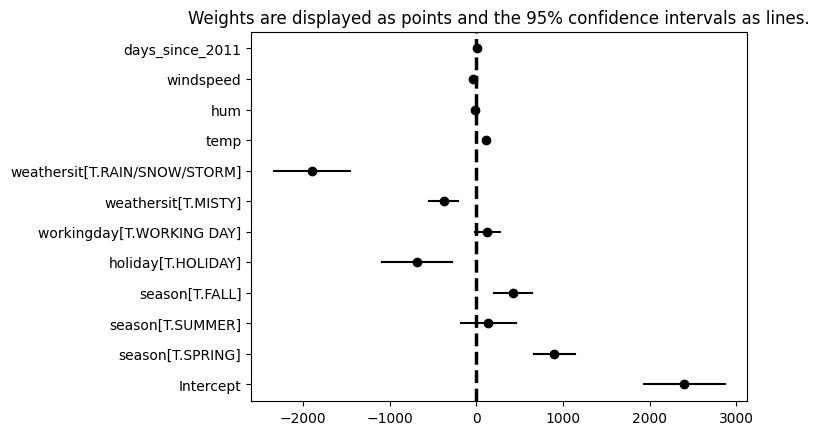

In [17]:
import matplotlib.pyplot as plt


coefs = mod.params
std_errs = mod.bse

# Calcular los límites del intervalo de confianza del 95%
lower = coefs - 1.96 * std_errs
upper = coefs + 1.96 * std_errs

# Crear la figura y el eje
fig, ax = plt.subplots()

# Dibujar los puntos y las líneas
ax.scatter(coefs, range(len(coefs)), color='black')
for i, (l, u) in enumerate(zip(lower, upper)):
    ax.plot([l, u], [i, i], color='black')

# Establecer las etiquetas del eje y
ax.set_yticks(range(len(coefs)))
ax.set_yticklabels(mod.params.index)
plt.axvline(x=0, c='black', ls='--', linewidth=2.5)

# Añadir título y leyenda
ax.set_title("Weights are displayed as points and the 95% confidence intervals as lines.")

# Mostrar la gráfica
plt.show()

O gráfico de peso mostra que o tempo chuvoso/nevado/tempestuoso tem um forte efeito negativo sobre o número previsto de bicicletas. O peso da característica dia útil é próximo de zero e zero está incluído no intervalo de 95%, o que significa que o efeito não é estatisticamente significativo

### Grafico de efeitos: 

Os pesos do modelo de regressão linear podem ser analisados de forma mais significativa quando são multiplicados pelos valores reais dos recursos. Os pesos dependem da escala dos recursos e serão diferentes se você tiver um recurso que mede, por exemplo, a altura de uma pessoa e mudar de metro para centímetro. O peso será alterado, mas os efeitos reais em seus dados não serão. Também é importante conhecer a distribuição do seu recurso nos dados, porque se você tiver uma variação muito baixa, isso significa que quase todas as instâncias têm contribuição semelhante desse recurso.

In [13]:
df_day['days_since_2011'] = (pd.to_datetime(df_day['dteday']) - pd.to_datetime(df_day['dteday']).min()).dt.days

In [14]:
x = df_day[bike_features_of_interest]

In [26]:
x.shape

(731, 8)

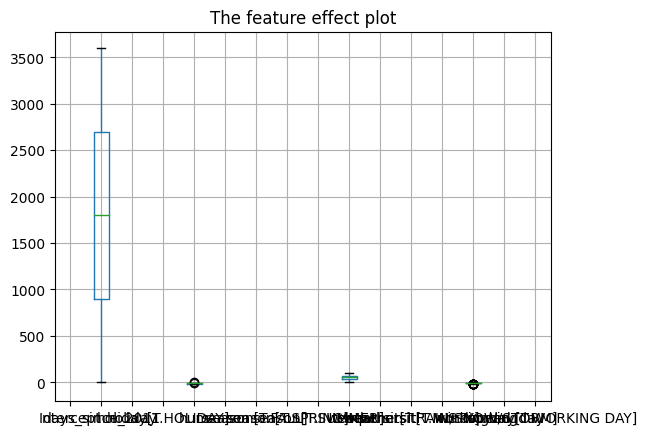

In [19]:
fig, ax = plt.subplots()

effects.boxplot(ax=ax)
ax.set_title('The feature effect plot')

plt.show()

In [27]:
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_since_2011
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,1
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,2
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,3
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,726
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,727
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,728
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,729
